In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load up the data and print it out to make sure it's right. 
data = pd.read_csv('income_inequality_data.csv')

print(data)

                                     Area Name Area Type  Median Income  \
0                        Cook County, Illinois     Urban        80579.0   
1                        Pope County, Illinois     Rural        57582.0   
2                    New York County, New York     Urban       101078.0   
3                    Hamilton County, New York     Rural        66891.0   
4   Los-Angeles-Long Beach-Anaheim, California     Urban        86587.0   
5                    Alpine County, California     Rural       101125.0   
6            Philadelphia County, Pennsylvania     Urban        60302.0   
7                  Forest County, Pennsylvania     Rural        60061.0   
8                       Wayne County, Michigan     Urban        57281.0   
9                      Baraga County, Michigan     Rural        55117.0   
10                     King County, Washington     Urban       120824.0   
11                 Garfield County, Washington     Rural        62411.0   

    Population Density (

In [15]:
# This cell takes the data and separates it into Urban and Rural areas.
# Then it combines all of the median income per type and takes the median of each type
urban_data = data[data['Area Type'] == 'Urban']
rural_data = data[data['Area Type'] == 'Rural']

urban_median_income = urban_data['Median Income'].median()
rural_median_income = rural_data['Median Income'].median()

print(f"Urban Median Income: {urban_median_income}")
print(f"Rural Median Income: {rural_median_income}")

Urban Median Income: 83583.0
Rural Median Income: 61236.0


In [16]:
# This entire cell is meant to calculate the Gini Index for all of the counties: closer to 1 means inequality, 
# closer to 0 means less inequality.
from scipy.integrate import trapezoid

# For the Gini index calculation, we need to have data for all income brackets since it is required to have an accurate
# representation of the county's income distribution compared to population.
income_brackets_midpoints = [5000, 12500, 20000, 30000, 42500, 62500, 87500, 125000, 175000, 250000]

regions = [
    'Cook County', 'Pope County', 'New York County', 'Hamilton County', 
    'Los Angeles County', 'Alpine County', 'Philadelphia County', 
    'Forest County', 'Wayne County', 'Baraga County', 'King County', 
    'Garfield County'
]

# Just manually inputting the data to make it less confusing than just loading in the database.
population_data = {
    'Cook County': [131259, 82566, 122791, 137610, 205357, 315446, 249816, 370490, 201123, 298509],
    'Pope County': [144, 109, 89, 86, 188, 262, 173, 188, 90, 20],
    'New York County': [59866, 39387, 47265, 42539, 48839, 82713, 68732, 98468, 68732, 229207],
    'Hamilton County': [52, 72, 112, 133, 273, 293, 259, 296, 147, 90],
    'Los Angeles County': [182876, 127067, 203578, 207028, 296741, 500318, 414056, 590030, 355998, 572778],
    'Alpine County': [9, 10, 21, 36, 33, 78, 26, 102, 57, 63],
    'Philadelphia County': [64094, 41287, 59177, 52296, 76380, 116979, 83261, 94171, 46791, 53673],
    'Forest County': [128, 78, 206, 290, 270, 443, 204, 192, 101, 29],
    'Wayne County': [63366, 42454, 59200, 68217, 83560, 115392, 80735, 101968, 43174, 48029],
    'Baraga County': [234, 163, 350, 337, 396, 657, 430, 487, 180, 100],
    'King County': [37041, 24674, 35130, 36078, 60784, 99715, 83261, 94171, 46791, 271722],
    'Garfield County': [41, 27, 39, 40, 67, 119, 110, 182, 125, 301]
}

# This is how the Gini Index is calculated 
def gini_index(income_brackets, population):
    sorted_indices = np.argsort(income_brackets)
    income_brackets_sorted = np.array(income_brackets)[sorted_indices]
    population_sorted = np.array(population)[sorted_indices]
    
    cumulative_population = np.cumsum(population_sorted) / population_sorted.sum()
    cumulative_income = np.cumsum(income_brackets_sorted * population_sorted) / (income_brackets_sorted * population_sorted).sum()

    gini = 1 - 2 * trapezoid(cumulative_income, cumulative_population)
    return gini

# Now that the Gini Index is calculated, we apply this formula for each county. 
gini_results = {}
for region, population in population_data.items():
    gini_results[region] = gini_index(income_brackets_midpoints, population)

# This will convert the results to a DataFrame and save to a CSV file for submission. 
gini_df = pd.DataFrame(list(gini_results.items()), columns=['Region', 'Gini Index'])
gini_df.to_csv('gini_index_results.csv', index=False)

print(gini_df)

                 Region  Gini Index
0           Cook County    0.417984
1           Pope County    0.425550
2       New York County    0.418001
3       Hamilton County    0.386667
4    Los Angeles County    0.409012
5         Alpine County    0.371918
6   Philadelphia County    0.455874
7         Forest County    0.404886
8          Wayne County    0.454266
9         Baraga County    0.416636
10          King County    0.383104
11      Garfield County    0.357004


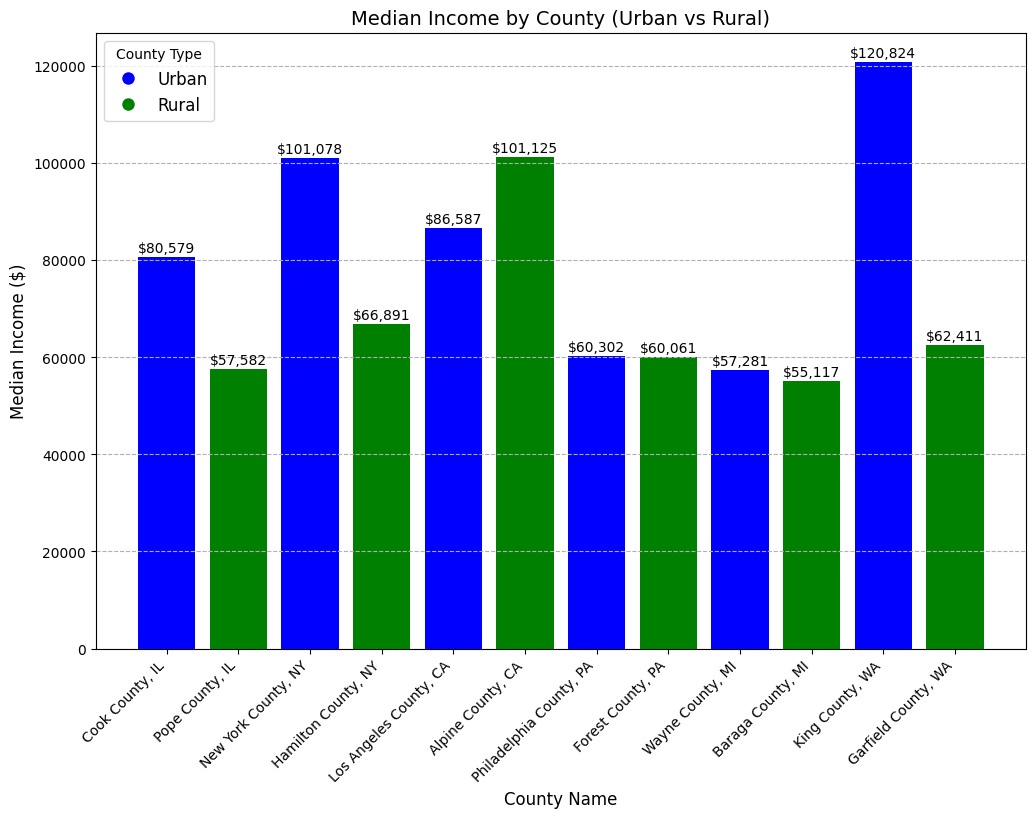

In [25]:
# This cell is meant to create a bar chart that shows the median income for each county, with the color of the bar
# representing whether the county is Urban or Rural.
area_names = [
    "Cook County, IL", "Pope County, IL", "New York County, NY", "Hamilton County, NY", 
    "Los Angeles County, CA", "Alpine County, CA", "Philadelphia County, PA", 
    "Forest County, PA", "Wayne County, MI", "Baraga County, MI", "King County, WA", 
    "Garfield County, WA"
]
median_incomes = [
    80579, 57582, 101078, 66891, 86587, 101125, 60302, 60061, 57281, 55117, 120824, 62411
]
area_types = [
    "Urban", "Rural", "Urban", "Rural", "Urban", "Rural", "Urban", "Rural", "Urban", 
    "Rural", "Urban", "Rural"
]

colors = ["blue" if area == "Urban" else "green" for area in area_types]

plt.figure(figsize=(12, 8))
plt.bar(area_names, median_incomes, color=colors)
plt.xlabel('County Name', fontsize=12)
plt.ylabel('Median Income ($)', fontsize=12)
plt.title('Median Income by County (Urban vs Rural)', fontsize=14)

# This will rotate the x-axis labels counter-clockwise so they aren't all overlapping with each other. 
plt.xticks(rotation=45, ha='right', fontsize=10)

# This is used to add grid lines to the y-axis to easily see the median income of each county
plt.grid(axis = 'y', linestyle='--', alpha=1)

# I'm using this to place the exact number of the median income above the bars
for i, income in enumerate(median_incomes):
    plt.text(i, income + 1000, f"${income:,}", ha='center', fontsize=10)

# Legend to indicate whether location is urban or rural
legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Urban'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Rural')
]
plt.legend(handles=legend_handles, title="County Type", loc='upper left', fontsize=12)

plt.show()

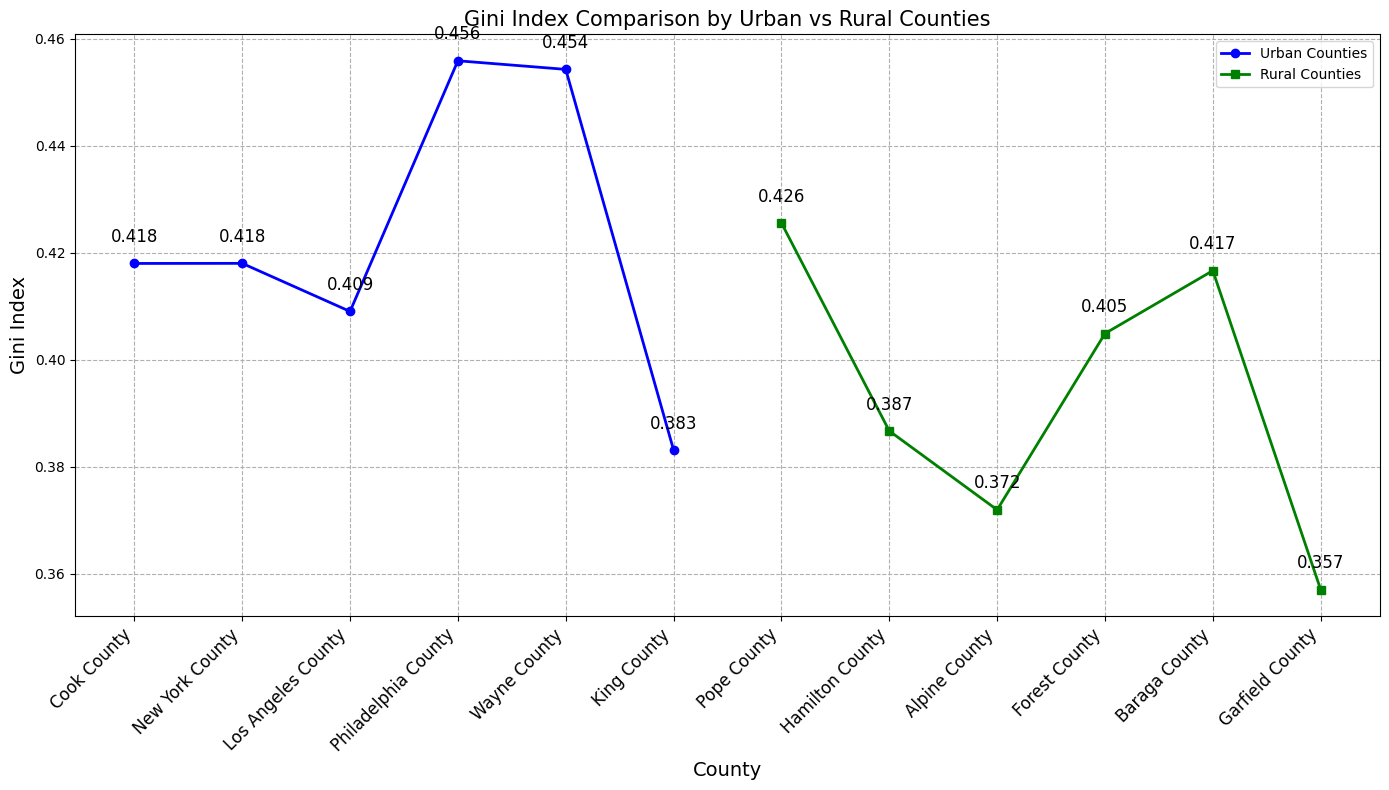

In [24]:
regions = [
    "Cook County", "Pope County", "New York County", "Hamilton County", 
    "Los Angeles County", "Alpine County", "Philadelphia County", 
    "Forest County", "Wayne County", "Baraga County", "King County", 
    "Garfield County"
]

gini_indices = [
    0.417984, 0.425550, 0.418001, 0.386667, 0.409012, 0.371918, 0.455874, 
    0.404886, 0.454266, 0.416636, 0.383104, 0.357004
]

area_types = [
    "Urban", "Rural", "Urban", "Rural", "Urban", "Rural", "Urban", 
    "Rural", "Urban", "Rural", "Urban", "Rural"
]

# Separate the data for urban and rural counties
urban_regions = [regions[i] for i in range(len(area_types)) if area_types[i] == "Urban"]
rural_regions = [regions[i] for i in range(len(area_types)) if area_types[i] == "Rural"]

urban_gini = [gini_indices[i] for i in range(len(area_types)) if area_types[i] == "Urban"]
rural_gini = [gini_indices[i] for i in range(len(area_types)) if area_types[i] == "Rural"]

plt.figure(figsize=(14, 8))

plt.plot(urban_regions, urban_gini, marker='o', color='blue', linestyle='-', linewidth=2, label='Urban Counties')

plt.plot(rural_regions, rural_gini, marker='s', color='green', linestyle='-', linewidth=2, label='Rural Counties')
plt.xlabel('County', fontsize=14)
plt.ylabel('Gini Index', fontsize=14)
plt.title('Gini Index Comparison by Urban vs Rural Counties', fontsize=15)

plt.xticks(rotation=45, ha='right', fontsize=12)

plt.grid(True, linestyle='--', alpha=1)

# Added the Gini Index values on top of the points in the line plot
for i, gini in enumerate(urban_gini):
    plt.text(i, gini + 0.004, f"{gini:.3f}", ha='center', fontsize=12)

for i, gini in enumerate(rural_gini):
    plt.text(i + len(urban_gini), gini + 0.004, f"{gini:.3f}", ha='center', fontsize=12)

plt.legend()

plt.tight_layout()

plt.show()

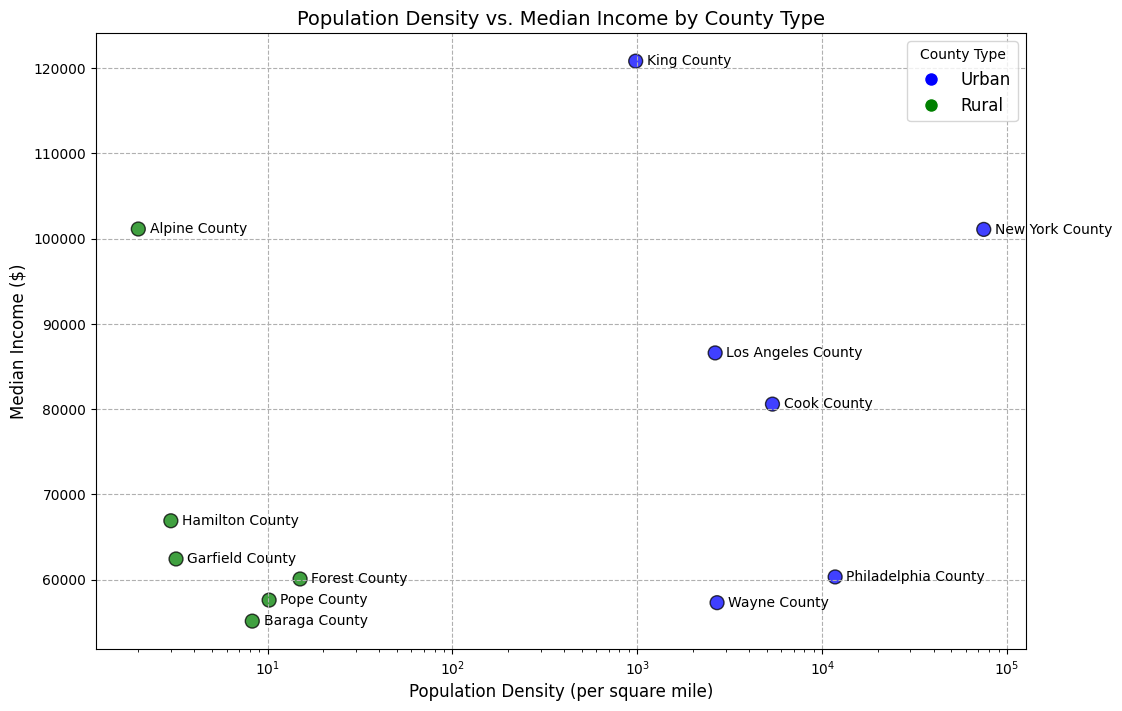

In [21]:
# This creates a scatter plot for the population density and median income of each county, with the color of the point
# being respective to their county type (rural or urban). I'm using this type of plot to further show the differences
# between income inequality and population distribution for these counties. 
regions = [
    "Cook County", "Pope County", "New York County", "Hamilton County", 
    "Los Angeles County", "Alpine County", "Philadelphia County", 
    "Forest County", "Wayne County", "Baraga County", "King County", 
    "Garfield County"
]
population_density = [
    5383.00, 10.20, 74782.00, 3.00, 2637.00, 2.00, 11749, 15, 2700, 8.27, 980, 3.2
] 
median_income = [
    80579, 57582, 101078, 66891, 86587, 101125, 60302, 60061, 57281, 55117, 120824, 62411
] 
area_types = [
    "Urban", "Rural", "Urban", "Rural", "Urban", "Rural", "Urban", 
    "Rural", "Urban", "Rural", "Urban", "Rural"
]

colors = ["blue" if area == "Urban" else "green" for area in area_types]

plt.figure(figsize=(12, 8))
plt.scatter(population_density, median_income, c=colors, s=100, edgecolor='black', alpha=0.75)
plt.xlabel('Population Density (per square mile)', fontsize=12)
plt.ylabel('Median Income ($)', fontsize=12)
plt.title('Population Density vs. Median Income by County Type', fontsize=14)

# This adds the county name to each of their respective points on the plot.
for i, region in enumerate(regions):
    plt.text(
        population_density[i] * 1.15,  # This moves the name a bit to the side so it isn't overlapping with the point.
        median_income[i], 
        region, 
        fontsize=10, 
        ha='left', 
        va='center'
    )

# Sets the scale for the x-axis to be log since the population density can be quite large for some counties. 
plt.xscale('log')

# Added gridlines for better plot readability. 
plt.grid(True, linestyle='--', alpha=1)

# Added this legend to show the difference between Urban and Rural counties.
legend_handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Urban'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Rural')
]
plt.legend(handles=legend_handles, title="County Type", loc='upper right', fontsize=12)

plt.show()